# Exploring Data BankChurn Analysis II

# Level 3 Further Analysis Questions

## Importing the necessary libraries 

In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation

In [2]:
# Checking the library versions 
print("Pandas version: ",pd.__version__)
print("Seaborn version: ",sns.__version__)
print("Matplotlib version: ",mat.__version__)

Pandas version:  1.4.4
Seaborn version:  0.11.2
Matplotlib version:  3.5.2


In [3]:
# Ensure that the data file is in the current working directory as that of the Jupyter notebook

df = pd.read_csv("DS1_C6_S1_BankChurn_Data_Concept.csv") # read_csv: inbuilt function of pandas to read files 

## 1. Which age group of women has a larger churn?

In [4]:
df.iloc[140,:]

CLIENTNUM                           789322833
Attrition_Flag              Attrited Customer
Customer_Age                               48
Gender                                      F
Dependent_count                             5
Education_Level                   High School
Marital_Status                        Married
Income_Category                Less than $40K
Card_Category                            Blue
Months_on_book                             38
Total_Relationship_Count                    1
Months_Inactive_12_mon                      3
Contacts_Count_12_mon                       3
Credit_Limit                           8025.0
Total_Revolving_Bal                         0
Avg_Open_To_Buy                        8025.0
Total_Trans_Amt                           673
Total_Trans_Ct                             18
Avg_Utilization_Ratio                     0.0
Name: 140, dtype: object

In [5]:
# Create age labels
females = df[(df["Gender"]=="F") & (df["Attrition_Flag"]=="Attrited Customer")] # accessing the data using conditional statements where & is a bitwise operator 
bins =     [0,30, 40,   50, 60, 70]                                             # Create the bins
labels =  ["Young", "Adult", "Senior", "Super-Seinor", "old"]                   # setting the labels for the bins 
data = pd.cut(females["Customer_Age"], bins = bins, labels = labels)

data = data.value_counts()                                                      # value count is counting the number of values in the column
data

Senior          446
Super-Seinor    257
Adult           169
old              28
Young            17
Name: Customer_Age, dtype: int64

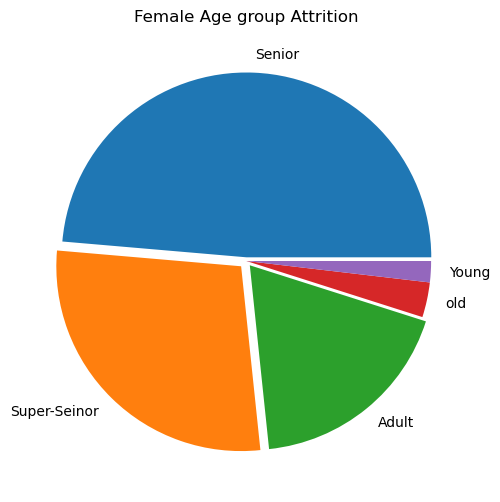

In [6]:
pie, ax = plt.subplots(figsize = [10,6])
plt.pie(x = data,explode = [0.02, 0.04, 0.03, 0,0] ,labels =data.index, pctdistance = 0.5) #autopct is used to present the percentage, explode is used to seprate the pie
                                                                                            # pctdistance is the distance betweeen the percentage numbers on the pie
plt.title("Female Age group Attrition")
plt.show()

## ***Interpretation: Senior women have higher churn followed by Super-Senior.

## 2. Analyze the churn of women customers based on their education levels. 

In [7]:
data = df[(df["Gender"]=="F") & (df["Attrition_Flag"]=="Attrited Customer")]

data = data["Education_Level"] 
data = data.value_counts()
data

Graduate         293
High School      171
Unknown          151
Uneducated       126
College           78
Doctorate         63
Post-Graduate     44
Name: Education_Level, dtype: int64

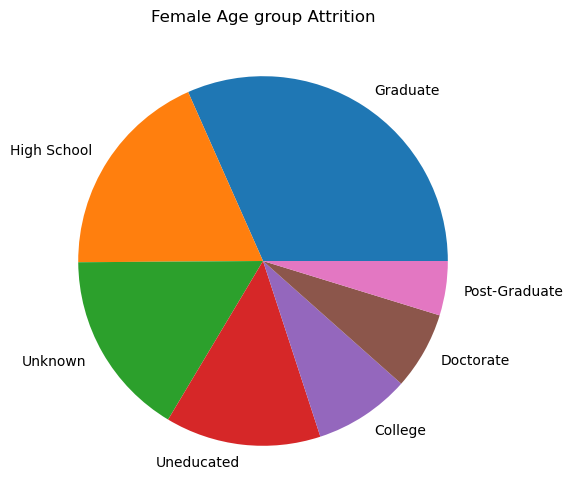

In [8]:
pie, ax = plt.subplots(figsize = [10,6])
plt.pie(x = data,labels =data.index, pctdistance = 0.5) #autopct is used to present the percentage, explode is used to seprate the pie
                                                                                            # pctdistance is the distance betweeen the percentage numbers on the pie
plt.title("Female Age group Attrition")
plt.show()

## ***Interpretation: Based on the education level, graduate females are churning out more compared to those who are post-graduate or doctorate. 

## 3. Do you think the average total transaction amount of women who churned out is different from those who are still with the bank?

In [9]:
with_bank = df[(df["Gender"] == "F") & (df["Attrition_Flag"] == "Existing Customer")]
left_bank = df[(df["Gender"] == "F") & (df["Attrition_Flag"] == "Attrited Customer")]
with_bank_mean = with_bank["Total_Trans_Amt"].mean()
left_bank_mean = left_bank["Total_Trans_Amt"].mean()

In [10]:
print(f"Women who are with the bank their average transaction amount is {round(with_bank_mean, 3)}")
print(f"Women who left the bank their average transaction amount is {round(left_bank_mean,3)}")

Women who are with the bank their average transaction amount is 4649.458
Women who left the bank their average transaction amount is 2784.701


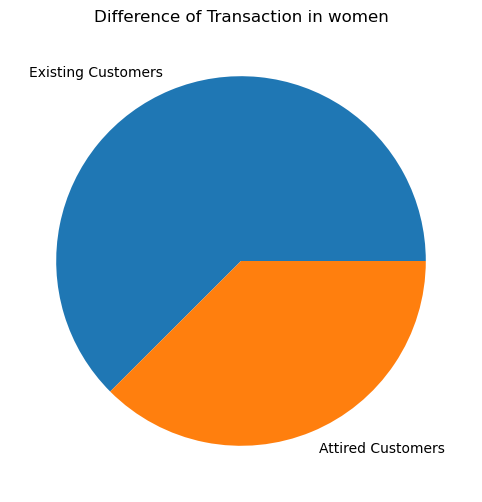

In [11]:
data = [4650, 2792]
fig, ax = plt.subplots(figsize = [10,6])
plt.pie(data, labels = ["Existing Customers", "Attired Customers"])
plt.title("Difference of Transaction in women")
plt.show()

## ***Interpretation: Yes, there is a difference in the transaction amount made by the women who are with the bank compared to the women who left the bank.

## 4. Age-wise analysis of the customers whose dependent count is 2 or 3 (Existing and Churned out)

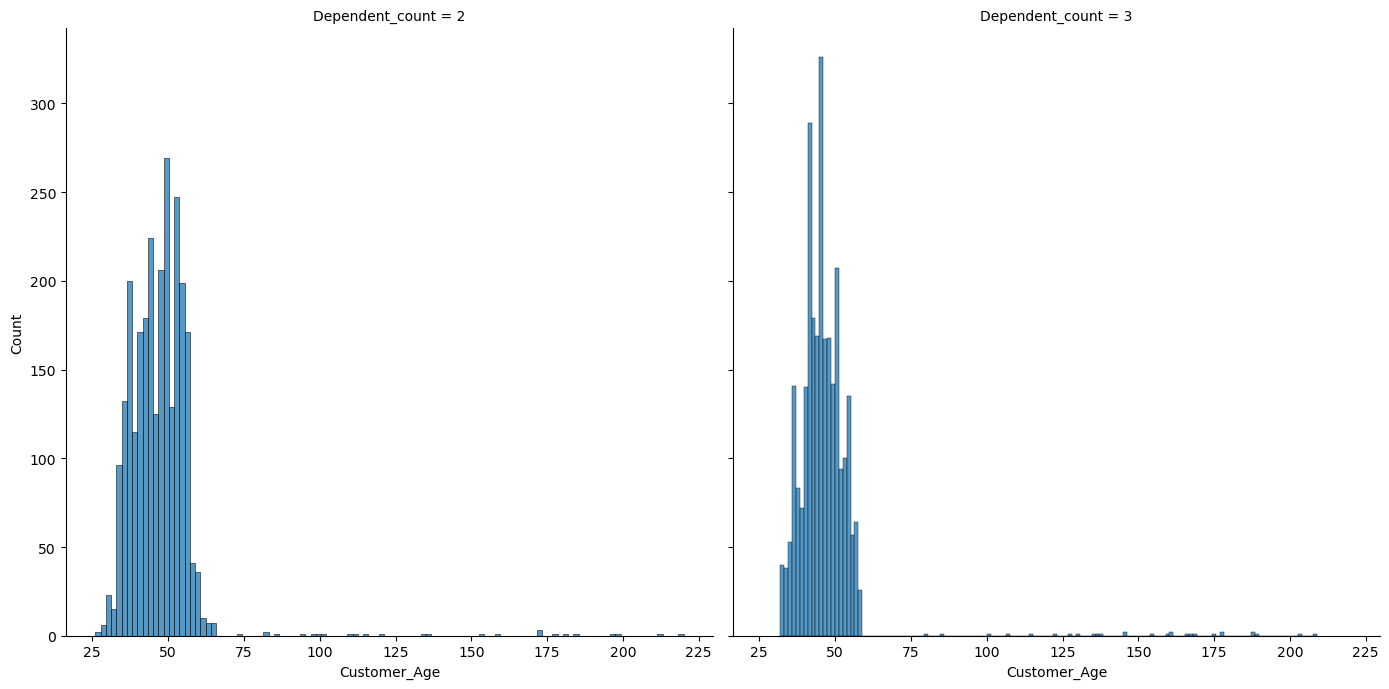

In [12]:
data = df[(df["Dependent_count"] == 2) | (df["Dependent_count"] == 3)]
g = sns.FacetGrid(data, col = "Dependent_count", height = 7)
g.map(sns.histplot, "Customer_Age")
plt.show()

###  More information is required to make a conclusion.

In [13]:
# checking for the average of the dependent count 2 and 3
dep_2_mean = data[data["Dependent_count"] == 2]["Customer_Age"].mean()
dep_3_mean = data[data["Dependent_count"] == 3]["Customer_Age"].mean()
print(dep_2_mean)
print(dep_3_mean)

47.202959028831565
46.568064753495214


## ***Interpretation: Most of the customers have the same age distribution based on their dependent counts.

## 5. Is there any relation between the number of dependents (2 or 3) and the education level of customers who are existing and those who churned out?

In [14]:
data = df[(df["Dependent_count"] == 2) | (df["Dependent_count"] == 3)]

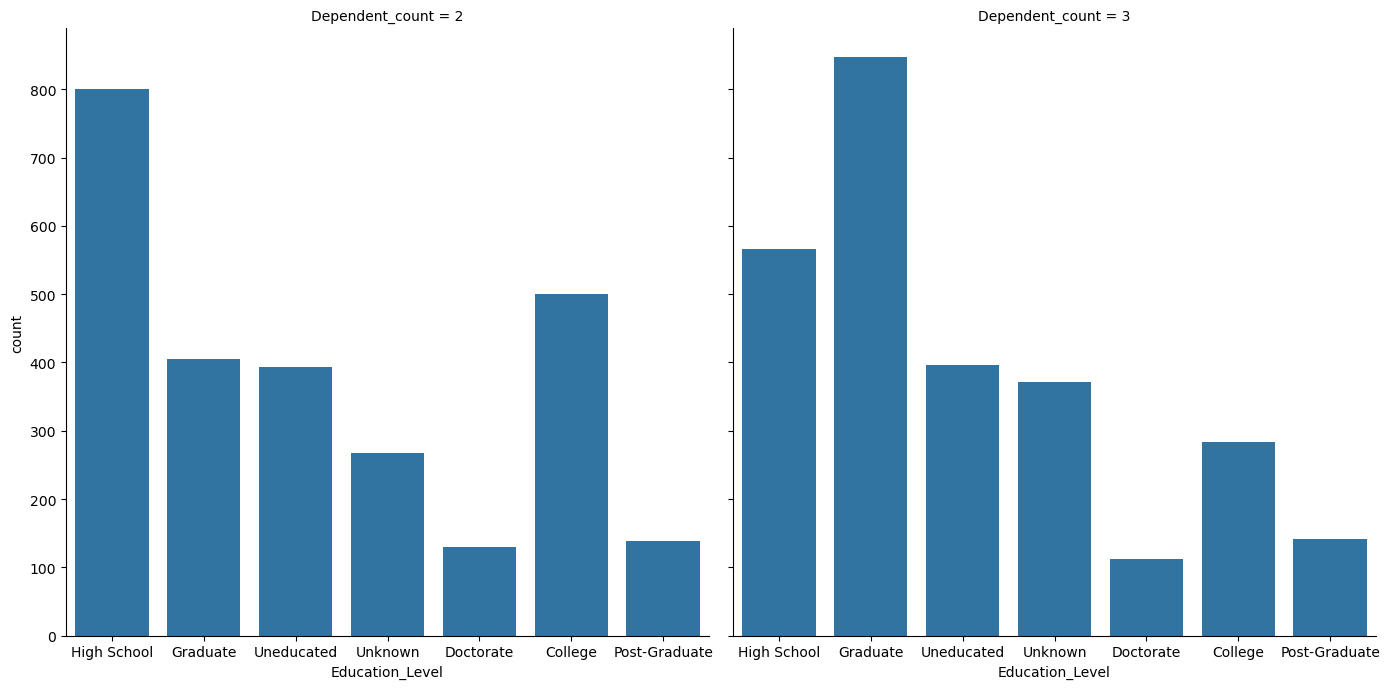

In [15]:
import warnings
warnings.filterwarnings('ignore')

g = sns.FacetGrid(data, col ="Dependent_count", height = 7)
g.map(sns.countplot, "Education_Level")
plt.show()

## ***Interpretation: The customers who have 2 dependents are usually high school and college pass outs, but those who have 3 dependents are graduates and high school pass outs. 

## 6. Do you think the column "Average open to buy" is affected by the dependent count (2 or 3)?

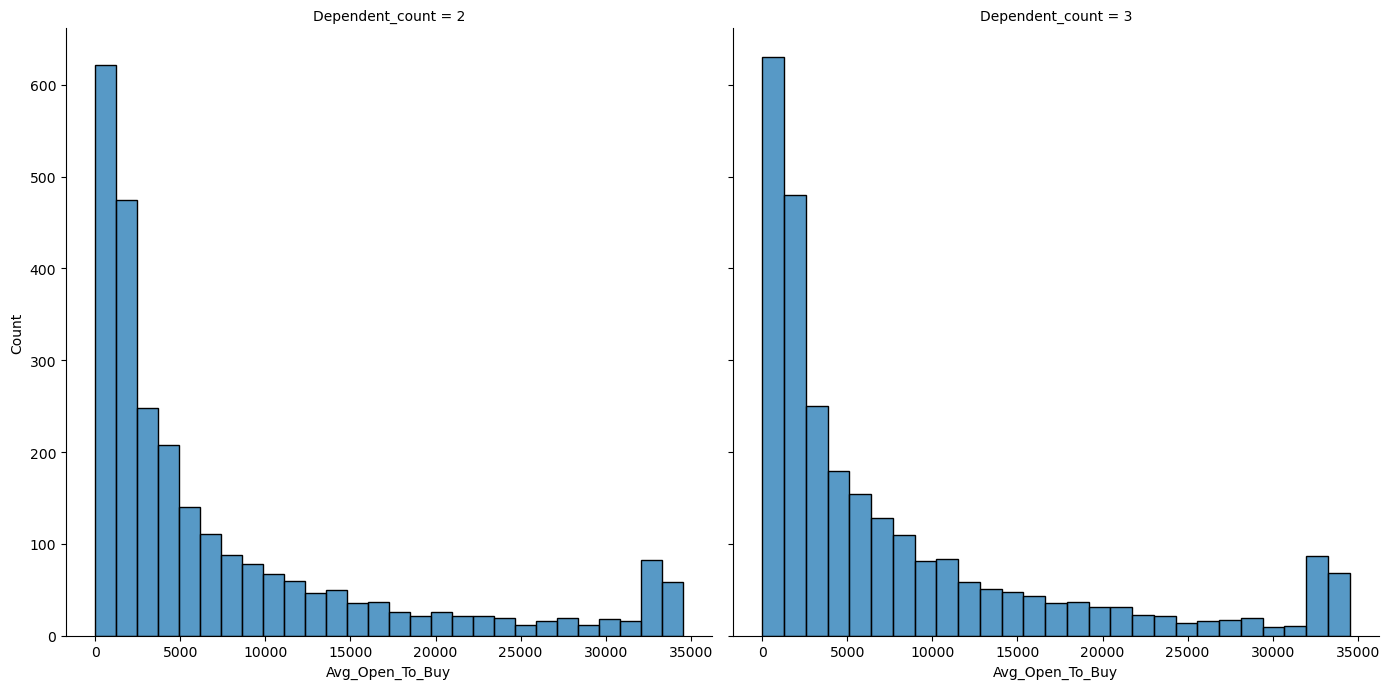

In [16]:
data = df[(df["Dependent_count"] == 2) | (df["Dependent_count"] == 3)]
g = sns.FacetGrid(data, col = "Dependent_count", height = 7)
g.map(sns.histplot, "Avg_Open_To_Buy")
plt.show()

####  More information is required to make a conclusion.

In [17]:
# checking for the average of the dependent count 2 and 3
dep_2_median = data[data["Dependent_count"] == 2]["Avg_Open_To_Buy"].median()
dep_3_median = data[data["Dependent_count"] == 3]["Avg_Open_To_Buy"].median()
print(dep_2_median)
print(dep_3_median)

3569.0
3830.5


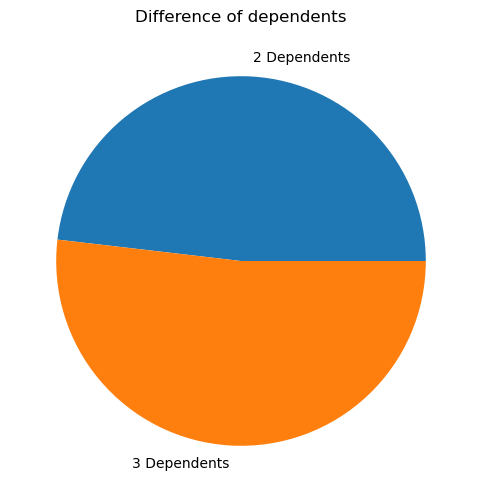

In [18]:
data = [3557, 3830]
fig, ax = plt.subplots(figsize = [10,6])
plt.pie(data, labels = ["2 Dependents", "3 Dependents"])
plt.title("Difference of dependents")
plt.show()

## 7. Card category wise analysis of customers who are high school pass outs and churned out

In [19]:
data_df = df[(df["Education_Level"] == "High School") | (df["Attrition_Flag"] == "Attrited Customer")]
print("There are "+str(len(data_df))+" number of customers who are high school pass outs and churned out.")

There are 3334 number of customers who are high school pass outs and churned out.


In [20]:
card_mode = data_df.Card_Category.mode()[0]
print(card_mode)
data_df["Card_Category"].fillna(card_mode, inplace = True)

Blue


Blue        3123
Silver       162
Gold          43
Platinum       6
Name: Card_Category, dtype: int64


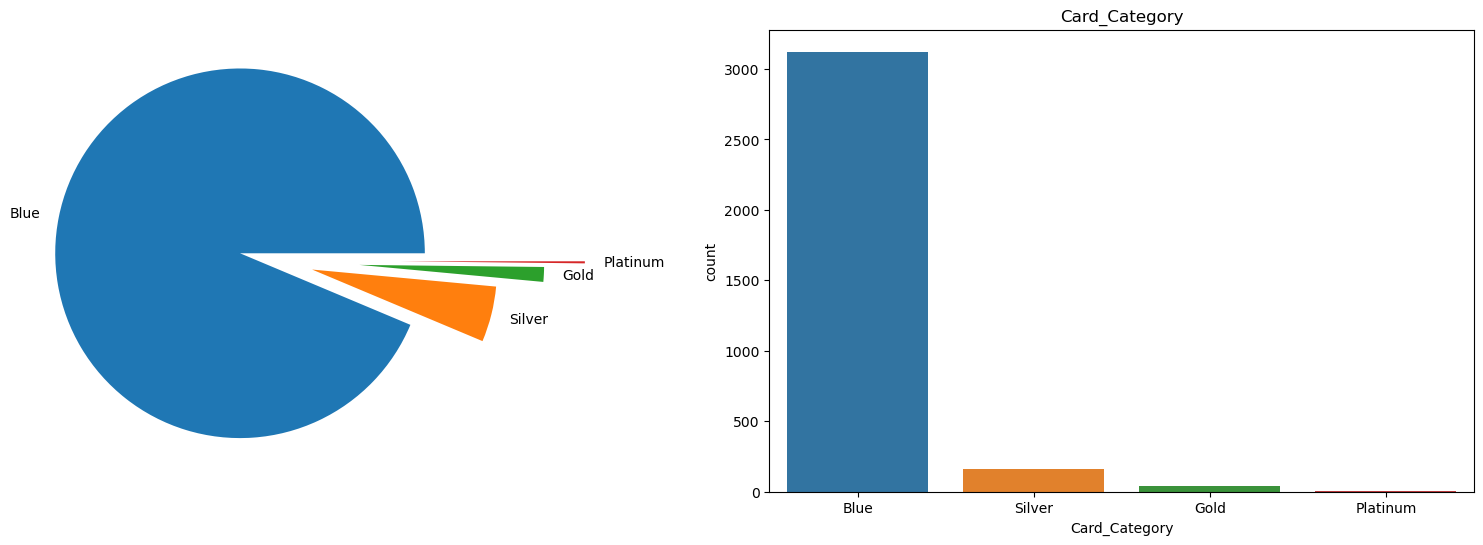

In [21]:

data = data_df["Card_Category"].value_counts()                                   #value count is counting the number of values in the column
print(data)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data.keys()                                                         # Keys returning you the index names in the data
ax[0].pie(x = data, explode = [0.2, 0.2, 0.45, 0.67], labels = labels)         # pctdistance is the distance between the percentage on pie chart from center.
                                                                                #  explode is to split the slices by the distance provided
sns.countplot(x = data_df["Card_Category"], ax = ax[1], order = data_df["Card_Category"].value_counts().index)                                                                                               
plt.title("Card_Category")                                                  # title is used to prints the title on the image. 
plt.show()

## ***Interpretation: Majority of the population is using the Blue card followed by Silver. The Platinum card is sold the least.

## 8. Income category wise breakdown of the customers who are high school pass outs and are still with the bank

In [22]:
data_df = df[(df["Education_Level"] == "High School") | (df["Attrition_Flag"] == "Existing Customer")]
print("There are "+str(len(data_df))+" number of customers who are high school pass outs and still with the bank.")

There are 8806 number of customers who are high school pass outs and still with the bank.


In [23]:
card_mode = data_df.Card_Category.mode()[0]
print(card_mode)
data_df["Card_Category"].fillna(card_mode, inplace = True)

Blue


Blue        8213
Silver       479
Gold          99
Platinum      15
Name: Card_Category, dtype: int64


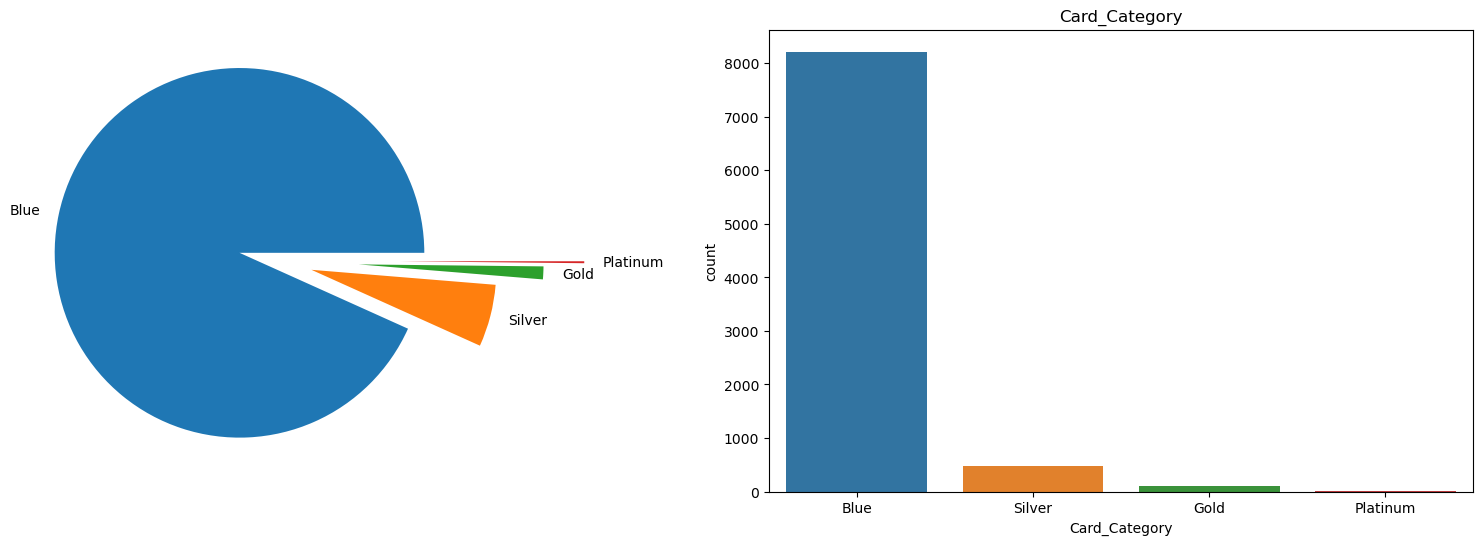

In [24]:

data = data_df["Card_Category"].value_counts()                                   #value count is counting the number of values in the column
print(data)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data.keys()                                                         # Keys returning you the index names in the data
ax[0].pie(x = data, explode = [0.2, 0.2, 0.45, 0.67], labels = labels)         # pctdistance is the distance between the percentage on pie chart from center.
                                                                                #  explode is to split the slices by the distance provided
sns.countplot(x = data_df["Card_Category"], ax = ax[1], order = data_df["Card_Category"].value_counts().index)                                                                                               
plt.title("Card_Category")                                                  # title is used to prints the title on the image. 
plt.show()

## ***Interpretation: Majority of the population is using the Blue card followed by Silver. The Platinum card is sold the least.

# =============================================================


# **Unguided Practice for Students

## 9. Present the details of Total Transaction Amount of existing customers who are high school pass outs. 

In [25]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000


In [37]:
data = df[(df["Attrition_Flag"] == 'Attrited Customer') & (df["Education_Level"] == 'High School')]
data = data["Total_Trans_Amt"] 
data = data.sum()
data

943000

## 10. Analysis of the education level of the customers who are with the bank and those who left

In [ ]:
with_bank = df[(df["Education_Level"] & (df["Attrition_Flag"] == "Existing Customer")]
left_bank = df[(df["Education_Level"] & (df["Attrition_Flag"] == "Attrited Customer")]
with_bank_mean = with_bank["Total_Trans_Amt"].mean()
left_bank_mean = left_bank["Total_Trans_Amt"].mean()

## 11. Analysis of Transaction Amount (mean, median, and mode) made by the existing customers and comparing it with those who are not existing

## 12. What is the average utilization ratio of the existing customers?

## 13. Analysis of the churned out customers who hold the blue card with respect to their income categories

## 14. Analysis of transaction amount (mean, median, mode) for blue card customers who are no longer with the bank and comparing it with the existing customers

## 15. How is the credit limit of the blue card customers affecting the churn?

## 16. Analysis of the dependent count with respect to the customers who have churned out and the customers who are still using the services

## 17. Is there a relation between the credit limit and the attrition of the customers?

## 18. What is the average utilization ratio of the credit card for each age sub-group between 40 and 50? (We need to group the customers into 4 buckets between 40 and 50.)

## 19. How are the education level and income category affecting the customer churn?

## 20. Identify the churned out customers with high income category, high education level, and high credit limit.